In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
import numpy as np
import random

# File to Load
mouse_metadata_path = Path(r"C:\Users\Maddy\Desktop\UNI\Homework\Weekly Homework\ASSIGNMENT - WEEK 5\MATPLOTLIB\Pymaceuticals\data\Mouse_metadata.csv")
study_results_path = Path(r"C:\Users\Maddy\Desktop\UNI\Homework\Weekly Homework\ASSIGNMENT - WEEK 5\MATPLOTLIB\Pymaceuticals\data\Study_results.csv")

In [2]:
# Read File and store into Pandas DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results= pd.read_csv(study_results_path)


In [3]:
# Combine the data into a single dataset.  
pymaceuticals_merg= pd.merge(study_results,mouse_metadata,how="left",on=["Mouse ID", "Mouse ID"])

In [4]:
#display
pymaceuticals_data = pd.DataFrame(pymaceuticals_merg)
display(pymaceuticals_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
#checking the number of mice 
mouse_count1= pymaceuticals_data['Mouse ID'].nunique()
mouse_count1

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
sorted_data=pymaceuticals_data.sort_values(["Mouse ID", "Timepoint"], ignore_index= False)
sorted_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
598,a203,10,51.852437,1,Infubinol,Female,20,23
758,a203,15,52.777870,1,Infubinol,Female,20,23
1018,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1143,z969,25,63.145652,2,Naftisol,Male,9,30
1407,z969,30,65.841013,3,Naftisol,Male,9,30
1529,z969,35,69.176246,4,Naftisol,Male,9,30
1730,z969,40,70.314904,4,Naftisol,Male,9,30


In [7]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Mouse_timepoint=sorted_data.loc[sorted_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
Mouse_timepoint

array(['g989'], dtype=object)

In [10]:
clean_pymaceitical_data=pymaceuticals_data.loc[pymaceuticals_data['Mouse ID']!='g989']
clean_pymaceitical_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_count=clean_pymaceitical_data['Mouse ID'].nunique()
mouse_count

248

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
#describe 
# Use groupby and Describe methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_var=clean_pymaceitical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
clean_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
clean_mean=clean_pymaceitical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
clean_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [14]:
clean_med=clean_pymaceitical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
clean_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [15]:
clean_std = clean_pymaceitical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
clean_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
clean_sem = clean_pymaceitical_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
clean_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
display_drugs_statistic=pd.DataFrame({"Mean Tumor Volume":clean_mean,
                                      "Median Tumor Volume":clean_med,
                                      "Tumor Volume Variance":clean_var,
                                      "Tumor Volume STD":clean_std,
                                      "Tumor Volume SEM":clean_sem})

display_drugs_statistic["Mean Tumor Volume"]=display_drugs_statistic["Mean Tumor Volume"].map("{:,.2f}".format)
display_drugs_statistic["Median Tumor Volume"]=display_drugs_statistic["Median Tumor Volume"].map("{:,.2f}".format)
display_drugs_statistic["Tumor Volume Variance"]=display_drugs_statistic["Tumor Volume Variance"].map("{:,.2f}".format)
display_drugs_statistic["Tumor Volume STD"]=display_drugs_statistic["Tumor Volume STD"].map("{:,.2f}".format)
display_drugs_statistic["Tumor Volume SEM"]=display_drugs_statistic["Tumor Volume SEM"].map("{:,.2f}".format)
display_drugs_statistic

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#Group
drug_groupby=clean_pymaceitical_data.groupby(["Drug Regimen"])
drug_summary=drug_groupby["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
drug_summary.columns=['Mean Tumor Volume (mm3)','Median Tumor Volume (mm3)', 'Tumor Volume (mm3) Variance','Tumor Volume (mm3) STD', 'Tumor Volume (mm3) Sem']

drug_summary

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Variance,Tumor Volume (mm3) STD,Tumor Volume (mm3) Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


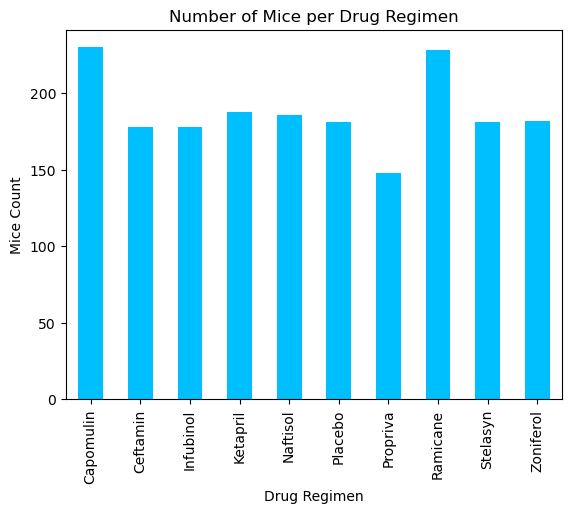

In [19]:
# #pandas -bar
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#bar chat,showing how many mouse are on which drug regimen
#need to groupby, work out count of mouse per DR -make it look pretty, add lables-01.07.09

drugmousecountbar=clean_pymaceitical_data.groupby('Drug Regimen')['Mouse ID'].count()
ax=bar_chart_pd=drugmousecountbar.plot(kind='bar', title='Number of Mice per Drug Regimen',stacked=True, color='#00BFFF')

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Mice Count")
plt.savefig('DrugRegimenandmicecount_pandas')

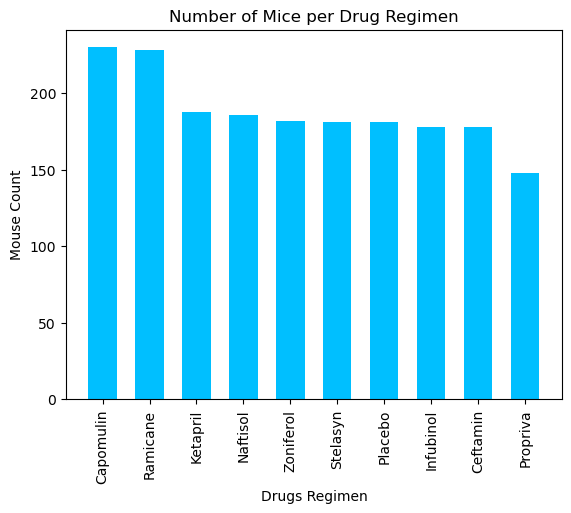

<Figure size 640x480 with 0 Axes>

In [20]:
fig = plt.figure()
y=clean_pymaceitical_data['Drug Regimen'].value_counts()
newy=y.values
x=y.index.values

plt.xlabel('Drugs Regimen')
plt.ylabel('Mouse Count')
plt.title('Number of Mice per Drug Regimen')
plt.xticks(rotation=90)


plt.bar(x,newy,width=.6,color='#00BFFF')
plt.show()

plt.savefig('DrugRegimenandmicecount_plt')


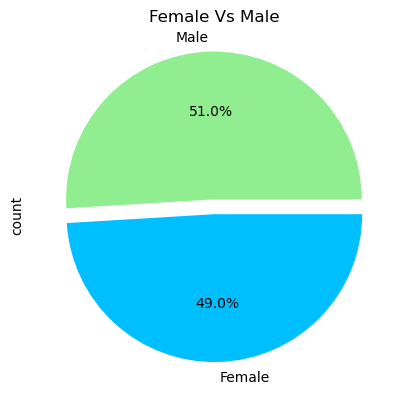

In [21]:
#pandas - subplot 
#Generate a pie plot showing the distribution of female versus male mice using Pandas

gendercount=clean_pymaceitical_data['Sex'].value_counts()
bar_chart_pd=gendercount.plot(kind='pie', title="Female Vs Male",autopct='%1.1f%%',explode=(0.1, 0),colors = ["#90EE90","#00BFFF"])


plt.savefig('Female Vs Male_plt')

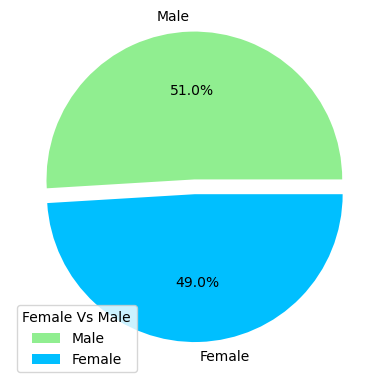

In [22]:
#plpot - subplot 
#Generate a pie plot showing the distribution of female versus male mice using Pandas
y=clean_pymaceitical_data['Sex'].value_counts()


pielabels=["Male","Female"]
pieexplode = [0.1, 0]
piecolors=["#90EE90","#00BFFF"]


plt.pie(y,labels=pielabels, explode=pieexplode, colors=piecolors,autopct='%1.1f%%')
plt.legend(title="Female Vs Male")

plt.savefig('Female Vs Male_pandas')

In [23]:
## Quartiles, Outliers and Boxplots

# Capomulin, Ramicane, Infubinol, and Ceftamin

#get information from DR and pull only Drug Data use merge and loc
#(loc)find each drug regimen in drug regimen and then merge all that are "Capomulin, Ramicane, Infubinol, and Ceftamin" together
merg_capo=pymaceuticals_merg.loc[pymaceuticals_merg["Drug Regimen"]=="Capomulin",:]
merg_rami=pymaceuticals_merg.loc[pymaceuticals_merg["Drug Regimen"]=="Ramicane",:]
merg_infu=pymaceuticals_merg.loc[pymaceuticals_merg["Drug Regimen"]=="Infubinol",:]
merg_cerf=pymaceuticals_merg.loc[pymaceuticals_merg["Drug Regimen"]=="Ceftamin",:]

#timepoint -  last (greatest)
merg_capo

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [24]:

# Start by getting the last (greatest) timepoint for each mouse
#for each drug, merge all the mouse id together and return the last(greatest) timepoint
Capomulinmerg=merg_capo.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
dfcap=pd.merge(Capomulinmerg,pymaceuticals_merg, on=("Mouse ID","Timepoint"),how="left")
dfcap

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
maxtum=clean_pymaceitical_data.groupby(['Mouse ID'])['Timepoint'].max()
maxtum=maxtum.reset_index()

merg_df=maxtum.merge(clean_pymaceitical_data,on=['Mouse ID','Timepoint'],how='left')
merg_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
boxtitle=("Tumor Volume per Drug Regimen")
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for x in treatment_list:
    vol_tumor= merg_df.loc[merg_df['Drug Regimen']==x,"Tumor Volume (mm3)"]
    tumor_vol_list.append(vol_tumor)
    quartile=vol_tumor.quantile([.25,.5,.75])
    lower=quartile[0.25]
    higher=quartile[0.75]
    iqr=higher-lower
    iqrlowerbound=lower- (1.5*iqr)
    iqrhigherbound=higher+(1.5*iqr)
    
    outliners=vol_tumor.loc[(vol_tumor<iqrlowerbound)|(vol_tumor>iqrhigherbound)]
    print(f'{x} outlines: {outliners}')


Capomulin outlines: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outlines: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outlines: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outlines: Series([], Name: Tumor Volume (mm3), dtype: float64)


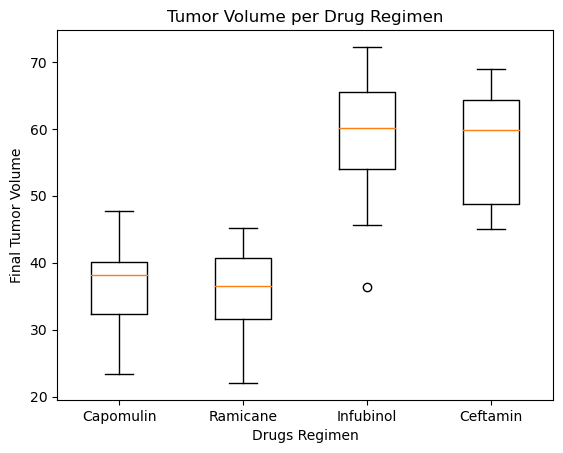

<Figure size 640x480 with 0 Axes>

In [37]:

boxplot = plt.boxplot(tumor_vol_list,labels=treatment_list)

plt.title('Tumor Volume per Drug Regimen')
plt.xlabel('Drugs Regimen')
plt.ylabel('Final Tumor Volume')
plt.show()
plt.savefig('Tumor Volume per Drug Regimen')

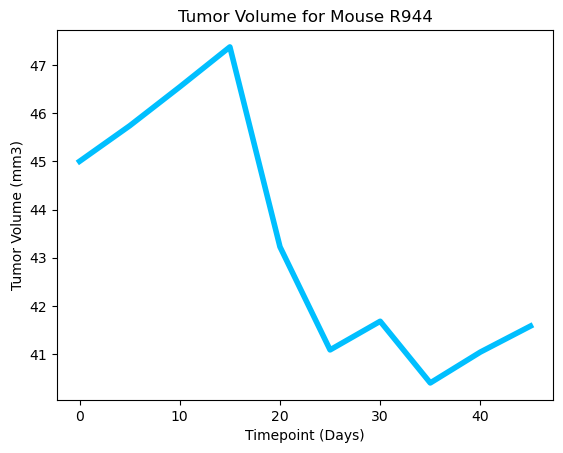

In [38]:

## Line and Scatter Plots

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
singlemouse = merg_capo.loc[merg_capo["Mouse ID"] == "r944",:]
singlemouse

xR944TP = singlemouse["Timepoint"]
yR944Tumor = singlemouse["Tumor Volume (mm3)"]

plt.title('Tumor Volume for Mouse R944')
plt.plot(xR944TP, yR944Tumor,linewidth=4, markersize=12,color='#00BFFF')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

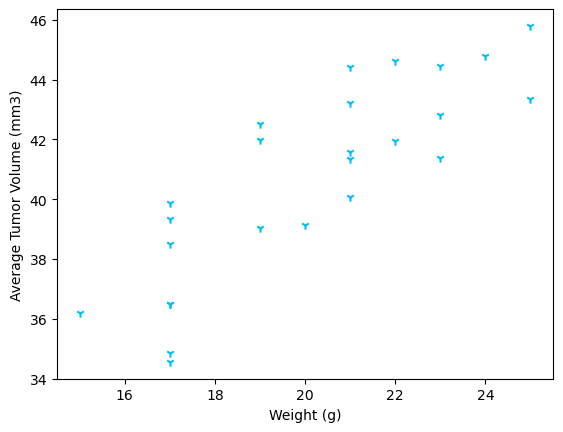

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avecapomultum = merg_capo.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
avecapomulweig = merg_capo.groupby("Mouse ID")['Weight (g)'].mean()
weightscatter=plt.scatter(avecapomulweig ,avecapomultum,color='#00BFFF',marker="1")


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show(weightscatter)

In [40]:
## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and  
# for mouse weight and average observed tumor volume for the entire Capomulin regimen 
print(f"The correlation coefficient between mouse weight and the average tumor volume  is {round(st.pearsonr(avecapomultum,avecapomulweig)[0],2)}")

The correlation coefficient between mouse weight and the average tumor volume  is 0.84


In [42]:
#a linear regression model
lingregress=st.linregress(merg_capo['Weight (g)'],merg_capo['Tumor Volume (mm3)'])
lingregress

LinregressResult(slope=0.960966943242836, intercept=21.489827213299556, rvalue=0.5256995552077169, pvalue=9.605446629501521e-18, stderr=0.10298279892023661, intercept_stderr=2.075157005491299)

In [43]:
#results 
slope=0.960966943242836
intercept=21.489827213299556

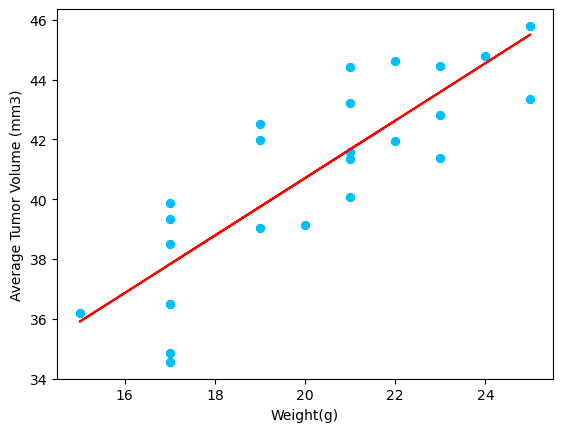

In [44]:
y_values = merg_capo['Weight (g)']*slope+intercept

plt.scatter(avecapomulweig ,avecapomultum,color='#00BFFF',marker="8")
plt.plot(merg_capo['Weight (g)'],y_values,color='red')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('linearregression')
plt.show()